# **Universidad Galileo**
### **Instituto de Investigación de Operaciones**
### ***Postgrado en Análisis y Predicción de Datos***
### ***Ciencia de Datos en Python***


####   Catedrático Titular: Preng Biba
####   Catedrático auxiliar: Milton Godinez

##### Denis Alexis Solis Arroyo - Carnet: 20 000 143
##### Marto Fredy Xam Chivalán - Carnet: 20 000 144



![Img AltText](https://www.galileo.edu/wp-content/uploads/2010/12/logo-ug.png)

    
# <center> Proyecto Final </center>

#### Las librerías a utilizar para realizar el proyecto se listan a continuación 

In [1]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#### El archivo se encuentra un formato binario de numpy .npy 
#### En la siguiente sección se carga el archivo al entorno

In [2]:
dataset = np.load('C:/Users/asoli/Documents/Maestria/5. Trimestre/Ciencia de Datos en Python/Proj_final/Data/proyecto_training_data.npy')

#### De acuerdo con la función shape, el archivo consta de 1460 registros con 6 columnas

In [3]:
dataset.data.shape

(1460, 6)

#### Se trasladó el arreglo de numpy a un data frame de pandas y se cambió el nombre de las colunas ara poder visualizarlo mejor

In [4]:
completeData = pd.DataFrame(dataset)
completeData.rename(columns={0: "SalesPrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"}, inplace = True)
completeData

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


#### A continuación se muestran las principales medidas de tendencia central, como se puede observar en su mayoría muestran que la media está muy cercana al percentil 50

In [5]:
#Ver las principales medidas de tendencia central
completeData.describe()


,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


#### Los rangos de los valores entre las variables se muestran a continuación:

In [6]:
print( "Rango SalesPrice " , max(completeData["SalesPrice"]) - min(completeData["SalesPrice"]))
print( "OverallQual " , max(completeData["OverallQual"]) - min(completeData["OverallQual"]))
print( "Rango 1stFlrSF " , max(completeData["1stFlrSF"]) - min(completeData["1stFlrSF"]))
print( "Rango TotRmsAbvGrd " , max(completeData["TotRmsAbvGrd"]) - min(completeData["TotRmsAbvGrd"]))
print( "Rango YearBuilt " , max(completeData["YearBuilt"]) - min(completeData["YearBuilt"]))
print( "Rango LotFrontage " , max(completeData["LotFrontage"]) - min(completeData["LotFrontage"]))


Rango SalesPrice  720100.0
OverallQual  9.0
Rango 1stFlrSF  4358.0
Rango TotRmsAbvGrd  12.0
Rango YearBuilt  138.0
Rango LotFrontage  292.0


#### La distribución de frecuencias de cada una de las variables se muestra a continuación 

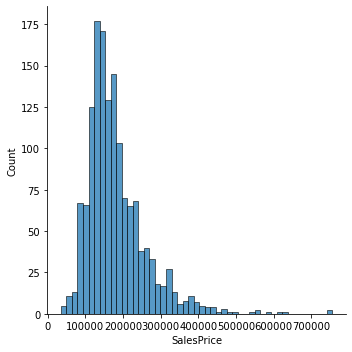

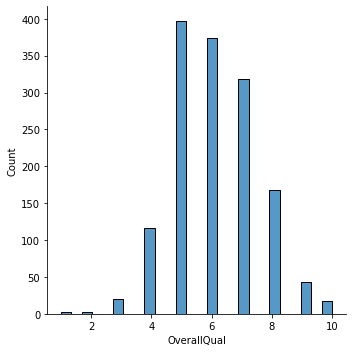

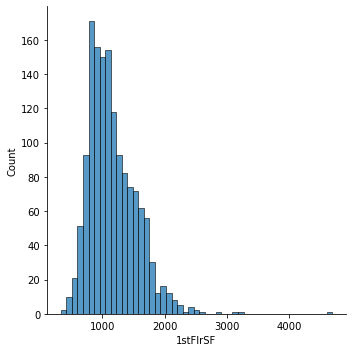

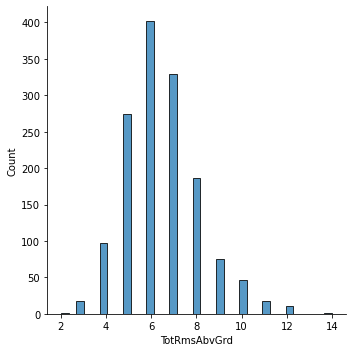

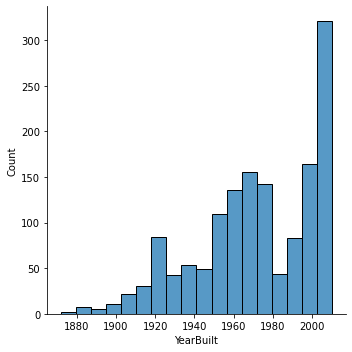

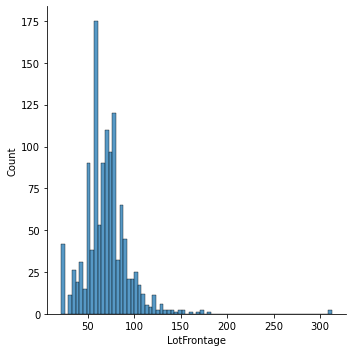

In [7]:
#Dibujar un histograma por cada una de las variables 
sns.displot(completeData["SalesPrice"])
sns.displot(completeData["OverallQual"])
sns.displot(completeData["1stFlrSF"])
sns.displot(completeData["TotRmsAbvGrd"])
sns.displot(completeData["YearBuilt"])
sns.displot(completeData["LotFrontage"])

#### El siguiente mapa de calor, muestra el grado de correlación entre cada una de las variables, como se puede observar, la variable que tiene más relación con el precio de venta es OverallQual, por lo que es la variable que se utilizara para el modelo

<AxesSubplot:>

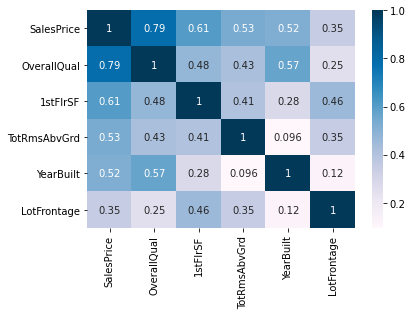

In [8]:
sns.heatmap(completeData.corr(method = "pearson"), annot=True, cmap = "PuBu")

#### Se separaran los valores en las variables X y Y

In [9]:
x = completeData["OverallQual"]
y = completeData["SalesPrice"]

#### Con la función de sklearn, se separa el dataset en 80% para entrenamiento y 20% para validación

In [10]:
#Crear los datasets 80% para training y 20% para test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state = 5)
data_train, data_test = train_test_split(dataset, test_size = 0.20, random_state = 5)

#### A continuación se presentan los gráficos de dispersión entre la variable Y y cada una de las variables X 

Text(0.5, 1.0, 'OverallQual vs Price Corr: 0.79098')

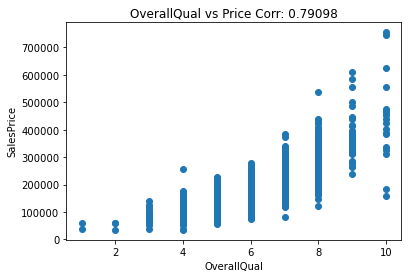

In [11]:
plt.scatter(completeData["OverallQual"], completeData["SalesPrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalesPrice")
plt.title("OverallQual vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["OverallQual"]), 5)))

Text(0.5, 1.0, '1stFlrSF vs Price Corr: 0.60585')

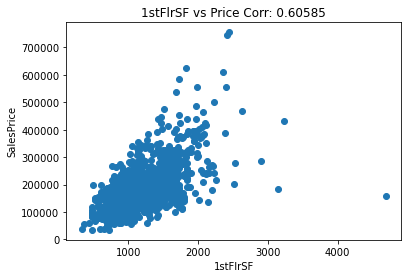

In [12]:
plt.scatter(completeData["1stFlrSF"], completeData["SalesPrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalesPrice")
plt.title("1stFlrSF vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["1stFlrSF"]), 5)))

Text(0.5, 1.0, 'TotRmsAbvGrd vs Price Corr: 0.53372')

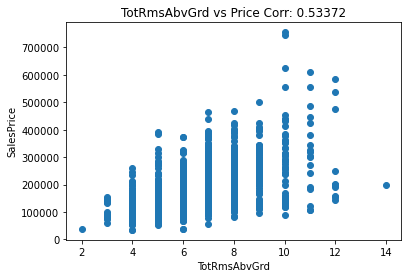

In [13]:
plt.scatter(completeData["TotRmsAbvGrd"], completeData["SalesPrice"])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalesPrice")
plt.title("TotRmsAbvGrd vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["TotRmsAbvGrd"]), 5)))

Text(0.5, 1.0, 'YearBuilt vs Price Corr: 0.5229')

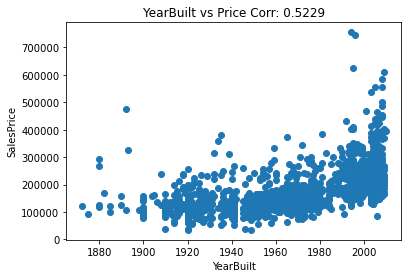

In [14]:
plt.scatter(completeData["YearBuilt"], completeData["SalesPrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalesPrice")
plt.title("YearBuilt vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["YearBuilt"]), 5)))

Text(0.5, 1.0, 'LotFrontage vs Price Corr: 0.3518')

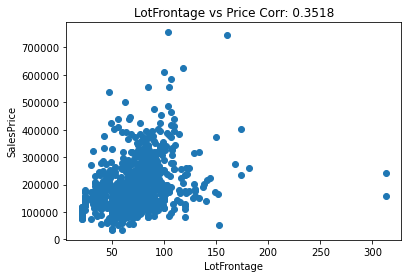

In [15]:
plt.scatter(completeData["LotFrontage"], completeData["SalesPrice"])
plt.xlabel("LotFrontage")
plt.ylabel("SalesPrice")
plt.title("LotFrontage vs Price Corr: " + str(round(completeData["SalesPrice"].corr(completeData["LotFrontage"]), 5)))

#### Para facilitar el procesamiento de la información, los set de datos de X y Y, se trasladaron a arreglos de numpy

In [16]:
# Crear arreglo con variables X y Y
xtraining = np.array(train_x)
ytraining = np.array(train_y)
xtest = np.array(test_x)
ytest = np.array(test_y)
data_training = np.column_stack((xtraining, ytraining))
data_training

array([[6.000e+00, 1.775e+05],
       [5.000e+00, 1.190e+05],
       [5.000e+00, 1.250e+05],
       ...,
       [3.000e+00, 9.100e+04],
       [5.000e+00, 1.439e+05],
       [4.000e+00, 1.290e+05]])

#### En la siguiente sección, se definen las variables a como B0, b como B1, las repeticiones o epochs, el alpha o learning rate del modelo 

#### Las variables a y b inician con un valor de 2 cada una, hasta que el modelo se optimice
#### Se definieron 10,000 repeticiones para generar el modelo por medio de gradientes

In [17]:
#definición de variables
a = 2
b = 2
repeticiones = 10000
learning_r = 0.01
error_cada = 10

#### La función de costo, determina el error de cada iteración, la función almacena como resultado final un diccionario, con los valores de x, y, a, b, la estimación, el error de la estimación y el error al cuadrado

In [18]:
    # Función costo
    # La función almacena los valores de cada observación y el error elevado al cuadrado
    def costo(x, y, a, b):
        n = len(x)
        errores_dict = {}
        for i in range(n):
            y_hat = a+b*x[i]
            error_est = (y_hat-y[i])
            error = 1/2*n*np.sum(np.power(y_hat-y,2))
            evento = i
            errores_dict[evento] = x[i], y[i], y_hat, error_est, error, a, b        
        return errores_dict

#### Como se puede observar en el siguiente diccionario, para los primeros 10 valores del set de training, cuando a y b, toman valores de 2, las predicciones no están nada cercanas a la realidad, por lo que los errores son muy altos

In [19]:
costo(xtraining[0:10], ytraining[0:10], a, b)

{0: (6.0, 177500.0, 14.0, -177486.0, 1067402533800.0, 2, 2),
 1: (5.0, 119000.0, 12.0, -118988.0, 1067430749200.0, 2, 2),
 2: (5.0, 125000.0, 12.0, -124988.0, 1067430749200.0, 2, 2),
 3: (5.0, 91500.0, 12.0, -91488.0, 1067430749200.0, 2, 2),
 4: (6.0, 121000.0, 14.0, -120986.0, 1067402533800.0, 2, 2),
 5: (5.0, 135500.0, 12.0, -135488.0, 1067430749200.0, 2, 2),
 6: (7.0, 196500.0, 16.0, -196484.0, 1067374318800.0, 2, 2),
 7: (5.0, 93000.0, 12.0, -92988.0, 1067430749200.0, 2, 2),
 8: (5.0, 147000.0, 12.0, -146988.0, 1067430749200.0, 2, 2),
 9: (7.0, 204900.0, 16.0, -204884.0, 1067374318800.0, 2, 2)}

#### La función de gradientes, tomará los valores de a y b, y los aplicará tantas veces han sido definidas en la variable repeticiones, en este caso se utilizarán 10,000 repeticiones, por lo que los valores de a y b cambiaran con relación a estas repeticiones.

#### La función almacena:
##### a) Los valores de los gradientes de a y b por cada iteración
##### b) Los valores de a(b0) y b(b1) a lo largo de cada iteración
##### c) El RMSE resultante de cada iteración, este arreglo será utilizado más adelante para graficar la curva del error
##### d) Los valores reales y los valores estimados, para graficar más adelante como se comportan estos

In [20]:
#Función para generar los gradientes
def gradientes(x, y, a, b, alpha, epochs):
    n = len(x)
    grad_a = np.array([])
    grad_b = np.array([])
    grad = np.column_stack((grad_a, grad_b))
    a_b = []
    rmse = []
    valores_reales = []
    estimaciones = []
    resultados = {}
    for i in range(epochs):
        estimado = a+b*x
        a_grad = 1/n*np.sum((estimado - y))
        b_grad = 1/n*np.sum((estimado-y)*x)
        a = a-alpha*a_grad
        b = b-alpha*b_grad
        grad_a = np.append(grad_a, [a_grad])
        grad_b = np.append(grad_b, [b_grad])   
        a_b.append((a,b))
        rmse.append(mean_squared_error(y, estimado, squared = False))
    estimaciones.append((estimado))
    valores_reales.append((y))
    resultados[epochs] = (a, b)  
    return a, b, resultados, a_b, rmse, estimaciones, valores_reales      

#### Al trasladar los valores de la función de gradientes y sustituir los valores de a y b, tenemos que a = -95,061.26 y b = 45,336.90, después de 10,000 iteraciones, se almacena el coste y los valores de a y b a lo largo de las iteraciones.

In [21]:
#Calculo de a y b así como de los resultados en cada repetición
a, b, resultados, a_b, rmse, estimaciones, valores_reales = gradientes(x = xtraining, y = ytraining, a = a, b= b, alpha = learning_r,  epochs = repeticiones)
a,b

(-95061.26220988165, 45336.90013348114)

#### Ahora los primeros 10 valores para el dataset de training arrojan los siguientes resulados:

In [22]:
costo(xtraining[0:10], ytraining[0:10], a, b)

{0: (6.0,
  177500.0,
  176960.1385910052,
  -539.861408994795,
  136613987126.89604,
  -95061.26220988165,
  45336.90013348114),
 1: (5.0,
  119000.0,
  131623.23845752404,
  12623.238457524043,
  76761623705.10509,
  -95061.26220988165,
  45336.90013348114),
 2: (5.0,
  125000.0,
  131623.23845752404,
  6623.238457524043,
  76761623705.10509,
  -95061.26220988165,
  45336.90013348114),
 3: (5.0,
  91500.0,
  131623.23845752404,
  40123.23845752404,
  76761623705.10509,
  -95061.26220988165,
  45336.90013348114),
 4: (6.0,
  121000.0,
  176960.1385910052,
  55960.138591005205,
  136613987126.89604,
  -95061.26220988165,
  45336.90013348114),
 5: (5.0,
  135500.0,
  131623.23845752404,
  -3876.761542475957,
  76761623705.10509,
  -95061.26220988165,
  45336.90013348114),
 6: (7.0,
  196500.0,
  222297.03872448634,
  25797.038724486338,
  402009801920.01105,
  -95061.26220988165,
  45336.90013348114),
 7: (5.0,
  93000.0,
  131623.23845752404,
  38623.23845752404,
  76761623705.10509,
 

#### Como se puede observar, algunas predicciones ya se acercan más a los valores reales, sin embargo, debido a que la información contiene valores muy dispersos, el error sigue siendo grande 

#### Con los arreglos de los valores reales de Y y las estimaciones se puede graficar en el eje X las estimaciones y en el eje Y los valores reales.

Text(0.5, 1.0, 'Dispersión entre las estimaciones y valores reales')

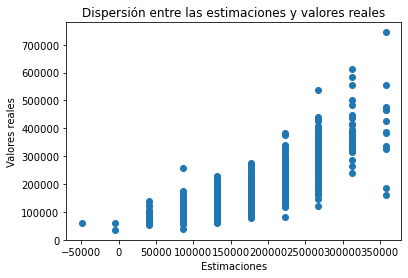

In [23]:
plt.scatter(estimaciones, valores_reales)
plt.xlabel("Estimaciones")
plt.ylabel("Valores reales")
plt.title("Dispersión entre las estimaciones y valores reales")

#### Una vez se han actualizado los valores de a y b, se puede gráficar la dispersión entre X y Y, también se puede gráficar la recta de la regresión lineal para el set de entrenamiento

Text(0.5, 1.0, 'Predicción con 10000 repeticiones')

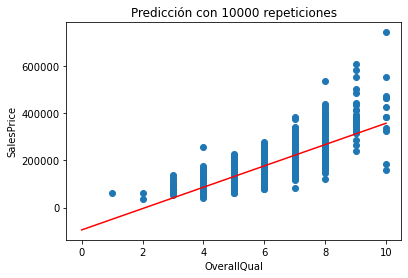

In [24]:
#Grafico con los resultados de a y b
plt.scatter(xtraining, ytraining)
pred_x = [0, max(xtraining)]
pred_y = [a+b*0, a+b*max(xtraining)]
plt.plot(pred_x, pred_y, "r")
plt.xlabel("OverallQual")
plt.ylabel("SalesPrice")
plt.title("Predicción con " + str(repeticiones) + " repeticiones")

#### La siguiente función, genera un gráfico de línea que muestra como se reduce el error con cada repetición.

In [25]:
#Función para validar como mejora el modelo con cada epoch
def regression(rmse):
    plt.figure(figsize=(16,3))
    plt.rcParams['figure.dpi'] = 227
    plt.plot(range(len(rmse)), rmse)
    plt.title('Algoritmo de gradientes', fontSize=14)
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.show()

<ipython-input-25-1bc61d73e91d>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Algoritmo de gradientes', fontSize=14)


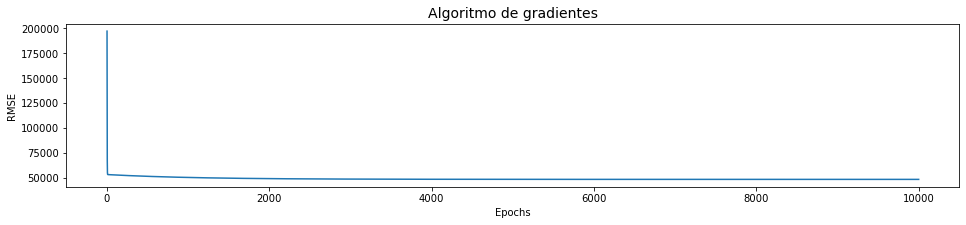

In [26]:
regression(rmse = rmse)

#### A continuación se utilizará la librería de scikitlearn (sklearn), para generar la regresión lineal de forma automática

#### La función Linear Regression, requiere que el arreglo de python tenga más de una dimensión, por lo que se crearan dos variables nuevas.

In [27]:
xtraining2 = np.array(xtraining).reshape(-1,1)
xtest2 = np.array(xtest).reshape(-1,1)

In [28]:
# Validar datos con scikit learn
regr = linear_model.LinearRegression()
regr.fit(xtraining2, ytraining)

LinearRegression()

In [29]:
regr_y_pred = regr.predict(xtest2)

#### A continuación se muestran los valores para B0 y B1, los valores calculados por medio del algoritmo de gradientes están muy cercanos a lo que devuelve la librería de Scikitlearn

In [30]:
print("Pendiente SKL: ", regr.coef_)
print("Pendiente Gradientes: ", b)
print("Intercepto SKL: ", regr.intercept_)
print("Intercepto Gradientes: ", a)

Pendiente SKL:  [45472.26394027]
Pendiente Gradientes:  45336.90013348114
Intercepto SKL:  -95925.19689717135
Intercepto Gradientes:  -95061.26220988165


#### Al comparar el RMSE que devuelve Scikit Learn vs el RMSE que resulta de hacer el cálculo por gradientes, se puede observar que el RMSE por gradientes es un poco menor, por lo que se podría considerar como un mejor modelo para elaborar las predicciones.

In [31]:
print("RMSE por SKL: ", mean_squared_error(ytest, regr_y_pred, squared = False))
print("RMSE por gradientes: ", rmse[-1])

RMSE por SKL:  49200.02681894079
RMSE por gradientes:  48439.27630616648


#### El siguiente gráfico, compara los los resultados al aplicar las variables a y b al set de validación, en este caso, se puede observar que las línea es exactamente igual al producido por la librería scikit learn.

##### La linea celeste representa los resultados del algoritmo de gradientes, mientras la línea azul el resultado devuelto por scikit learn

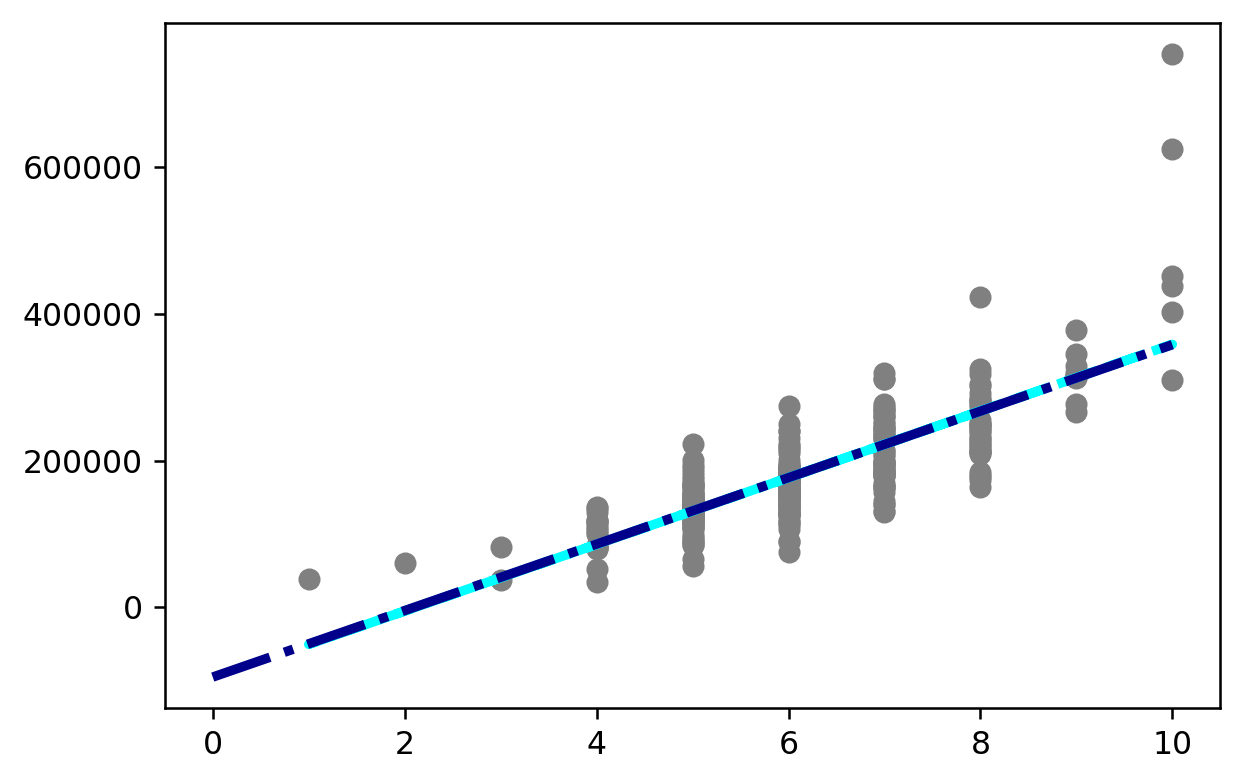

In [32]:
plt.scatter(xtest2, ytest, color = "gray")
plt.plot(xtest2, regr_y_pred, color = "cyan", linewidth = 3, linestyle = "dashed", label = "Gradientes")
pred_x_test = [0, max(xtest)]
pred_y_test = [a+b*0, a+b*max(xtest)]
plt.plot(pred_x, pred_y, "r", color = "darkblue", linewidth = 3, linestyle = "dashdot", label = "SKL")

#### Al utilizar la función del costo con el set de validación, se puede validar que los errores para cada predicción disminuyen considerablemente, por lo que el modelo está más óptimo.

#### Se trasladaron los resultados de la función de costo a un dataframe, para visualizar mejor la información, este dataframe será utilizado más adelante para gráficar la distribución de las predicciones y errores comparados con scikit learn.

In [33]:
errores_dict = costo(xtest, ytest, a, b)
testdf = pd.DataFrame.from_dict(errores_dict, orient = "index")
testdf.rename(columns={0: "x", 1: "y", 2: "yhat", 3: "error", 4: "error2", 5: "a", 6: "b"}, inplace = True)
testdf.head()

,x,y,yhat,error,error2,a,b
0,8.0,212000.0,267633.938858,55633.938858,5.846140e+14,-95061.26221,45336.900133
1,6.0,193000.0,176960.138591,-16039.861409,2.780600e+14,-95061.26221,45336.900133
2,6.0,274970.0,176960.138591,-98009.861409,2.780600e+14,-95061.26221,45336.900133
3,4.0,107000.0,86286.338324,-20713.661676,6.725243e+14,-95061.26221,45336.900133
4,6.0,135000.0,176960.138591,41960.138591,2.780600e+14,-95061.26221,45336.900133


In [34]:
ytest1 = testdf["y"]
yhat1 = testdf["yhat"]

#### El RMSE devuelto por el set de validación es similar a los valores que devuelve el set de entrenamiento por medio de gradientes y de scikit learn. Por lo que se puede concluir que el algoritmo está funcionando de forma correcta. 

In [35]:
print("RMSE por SKL: ", mean_squared_error(ytest, regr_y_pred, squared = False))
print("RMSE por gradientes: ", rmse[-1])
print("RMSE del set de validación: ", mean_squared_error(ytest1, yhat1, squared = False))

RMSE por SKL:  49200.02681894079
RMSE por gradientes:  48439.27630616648
RMSE del set de validación:  49201.403099376854


#### Para graficar la distribución de los errores se trasladan los valores devueltos por el algoritmo de gradientes y scikit learn hacia arreglos individuales. 

In [36]:
grad_y = np.asmatrix(ytest1) - np.asmatrix(yhat1)
sk_y = ytest - regr_y_pred

#### La siguiente gráfica, muestra la distribución del error, para  el algoritmo de gradientes y scikit learn, como se puede apreciar, ambos modelos tienen la misma distribución, por lo que se puede concluir que la función de gradientes funciona de forma óptima con diez mil repeticiones.

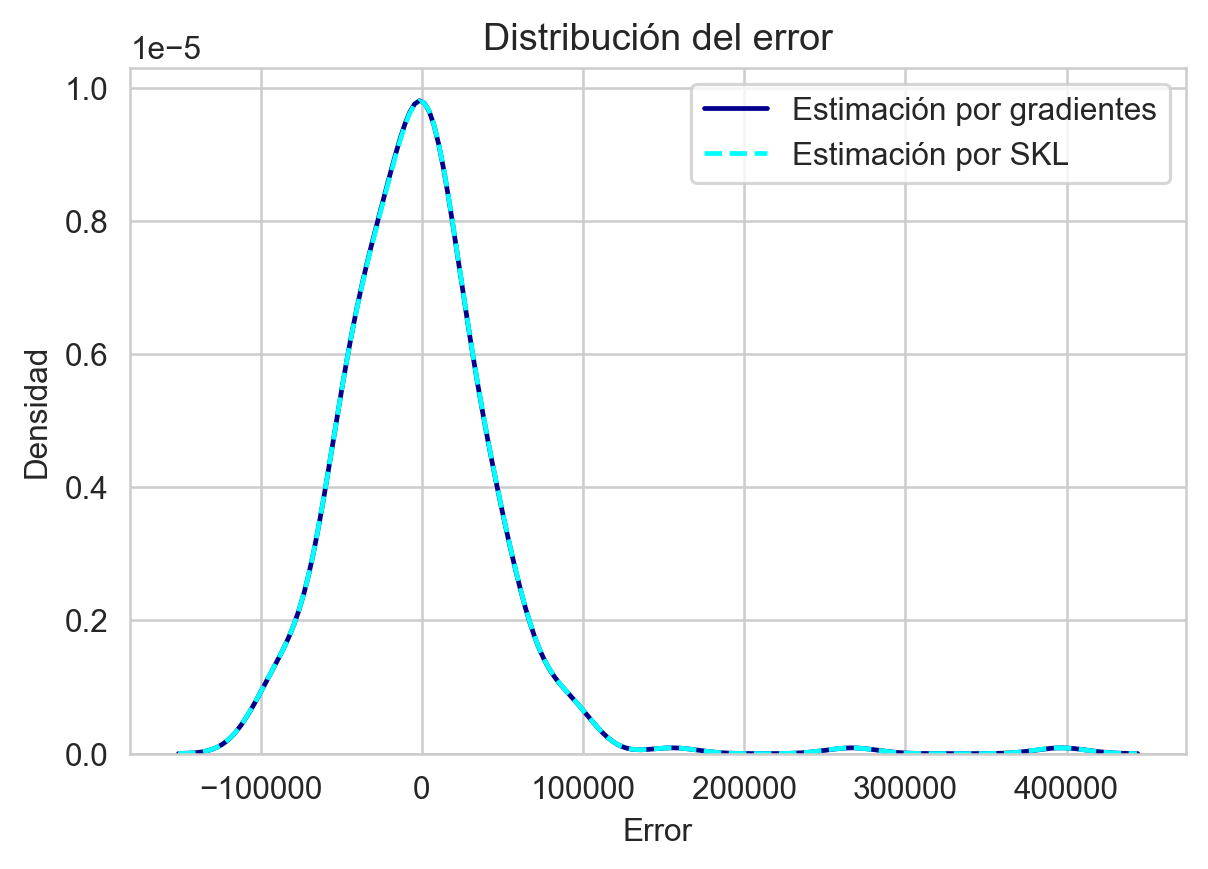

In [39]:
sns.set_style("whitegrid")
sns.kdeplot(np.asarray(grad_y)[0], label = "Estimación por gradientes", color = "darkblue")
sns.kdeplot(np.array(sk_y), label = "Estimación por SKL", color = "cyan", linestyle = "--")
plt.title("Distribución del error")
plt.xlabel("Error")
plt.ylabel("Densidad")
plt.legend()
plt.show()
    

#### A continuación se presenta un gráfico que muestra cual es la distribución de prediciones para Y, nuevamente, tanto el algoritmo de gradientes como scikit learn devuelven los mismos resultados. 

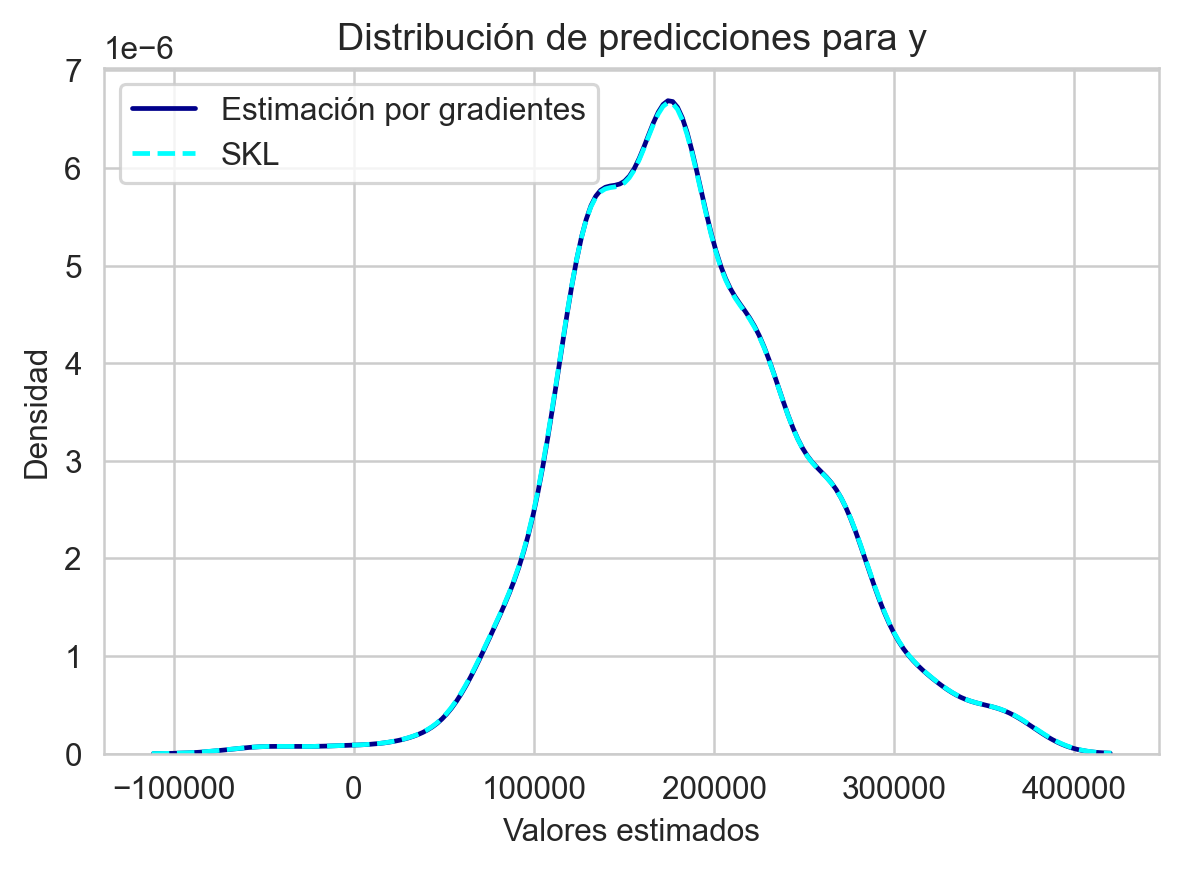

In [38]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(yhat1), label = "Estimación por gradientes", color ="darkblue")
sns.kdeplot(regr_y_pred, label = "SKL", color = "cyan", linestyle = "--")
plt.title("Distribución de predicciones para y")
plt.xlabel("Valores estimados")
plt.ylabel("Densidad")
plt.legend()
plt.show()

### Conclusiones

#### El algoritmo de gradiente descendente funciona para implementar proyectos de machine learning, en el presente caso, se podría sustituir la variable x, al inicio del notebook y se podría ver como predicen los modelos para cada una de las variables x, en el caso actual se utilizó la variable de OverallQual, debido a que era la que tenía la mayor correlación con el precio de venta.

#### El resultado devuelto por el algoritmo de gradientes y por scikit learn son iguales, fue necesario usar diez mil repeticiones en el algoritmo de gradientes para llegar al resultado optimo.

#### La regresión no busca ser exacta y predecir todos los resultados de forma exacta, sino más bien, ser lo más fiable con relación a los valores de entrada, en este sentido, ambas regresiones devuelven una línea que trata de predecir de buena manera los valores de Y, sin embargo, se debe considerar que la información contiene muchos *outliers* por lo que los errores pueden llegar a estar muy distantes del valor real.

#### El RMSE en ambos modelos es similar, sin embargo, debido a que los valores de las casas son bastante altos, si existe una variación en los precios reales, podría generarse un error muy grande.

#### Tomando de base el RMSE, se puede concluir que ambos modelos son buenos, sin embargo, si debiera tomarse uno en particular debería ser el resultante del algoritmo de gradientes, ya que aprende conforme cada repetición y encuentra un punto óptimo para hacer predicciones.